# STEP 1: Business Understanding

 Our goal is to find which machine learning model is best suited to predict sentiment (output) given a customer quality complaint (input).
 This will enable the quality department to quickly identify which customer related grouping is the most problematic and address formulation issues accordingly
 Help us identify what keywords customers associate with different types of formulation issues

# STEP 2: Analytical Approach, Data Requirement,Data Collection and Data Understanding

2.1. Analytical Approach: Multi-Class Classification using SVM, Decision Tree, Naive Bayes and Logistic Regression using bag of words as the text representation technique since we are concerned with the words but not their order

2.2. Data Requirements : Require labelled dataset showing different quality reason codes associated with different customer complaint descriptions. The complaint descriptions will needs to be converted from text to numerical values before being used in the classification models. The reviews need to be formatted prior to conversion using the text representation technique

2.3. Data collection:
 > Data set is from the customer complaints department containing 3022 entries
 > No sql required for database extraction
 > The dataset contains 2 columns (customer complaint and complaint grouping) that will help us identify what customer description falls under which complaint grouping


##### 2.4. Data Understanding (Exploratory Data Analysis/Descriptive statistics/data visualization)

In [1]:
# Read the dataset

import pandas as pd  
pd.set_option('display.max_columns', 2) 
df_Complaints= pd.read_excel('CustomerComplaints.xlsx') 
df_Complaints.head(10) 
print(df_Complaints) 




                                        Reason Reason group
0                                Lumpy product        Lumpy
1                                Lumpy product        Lumpy
2                     Incorrect product inside       Colour
3      Colour not matching Product Colour Card       Colour
4     Colour not matching product Colour guide       Colour
...                                        ...          ...
3016                             Viscosity Low    Viscosity
3017                          Washability poor        Bitty
3018                         Yellowing Product    Yellowing
3019                         Yellowing Product    Yellowing
3020                         Yellowing Product    Yellowing

[3021 rows x 2 columns]


> As can be seen the data consists of 3020 rows
> will take a subset for modelling


In [2]:
# Check the datatype of each column to identify if columns have numerical or categorical variables which is important before cleaning the data
df_Complaints.dtypes

Reason          object
Reason group    object
dtype: object

In [3]:
# Find the description of the dataset
pd.set_option('display.max_rows', None)
df_Complaints.describe()

# what does this tell you: 3021 reasons for customer complaints and 3019 reason groups. 99 unique reason codes and 109 unique reasons. Top issue is gelling.

,Reason,Reason group
count,3021,3019
unique,109,99
top,Gelled,Gelled
freq,468,365


In [4]:
# find a summary of the dataset
import pandas as pd
pd.set_option('display.max_rows', 40)
df_Complaints.info()

# all columns have non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Reason        3021 non-null   object
 1   Reason group  3019 non-null   object
dtypes: object(2)
memory usage: 47.3+ KB


# STEP 3: Data Preparation (Python or SQL)

#### 3.1. Clean the data

In [5]:
# find all missing data
df_Complaints.isnull().sum().sort_values(ascending=False)   # counts null values and arranges columns in ascending order with the most missing values

# in percentage form

# % of rows missing in each column
for column in df_Complaints.columns:   # loops through columns in dataframe
    percentage = df_Complaints[column].isnull().mean()   # find the percentage of each null value
    print(f'{column}: {round(percentage*100, 2)}%')   # rounds percentage to 2 decimal places. Using F string to seperate value from string
    
# For the given dataset there are missing Reason group values

Reason: 0.0%
Reason group: 0.07%


In [6]:
#Dealing with missing values will be done by removing the rows that have missing values since there are few entries

df_Complaints = df_Complaints.dropna(subset=['Reason group'])   #dropna can automatically drop the null values in the row

df_Complaints.describe() 

,Reason,Reason group
count,3019,3019
unique,109,99
top,Gelled,Gelled
freq,468,365


In [7]:
df_Complaints.isnull().sum().sort_values(ascending=False)
# as can be seen new dataframe has no null values

Reason          0
Reason group    0
dtype: int64

In [8]:
pip install nltk

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Make a copy of the DataFrame to avoid unintentional copy issues
df_normalized = df_Complaints.copy()

# Normalize 'Reason' column: Convert to lowercase and remove whitespace/punctuation
df_normalized['Reason'] = df_normalized['Reason'].apply(lambda x: x.lower().strip())
df_normalized['Reason'] = df_normalized['Reason'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Normalize 'Reason group' column: Convert to lowercase and remove whitespace/punctuation
df_normalized['Reason group'] = df_normalized['Reason group'].apply(lambda x: x.lower().strip())
df_normalized['Reason group'] = df_normalized['Reason group'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenization: Tokenize 'Reason' column
df_normalized['tokenized_text'] = df_normalized['Reason'].apply(word_tokenize)

# Stopword Removal: Remove stopwords from 'tokenized_text' column
stop_words = set(stopwords.words('english'))
df_normalized['tokenized_text'] = df_normalized['tokenized_text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

# Stemming or Lemmatization: Apply lemmatization to 'tokenized_text' column
lemmatizer = WordNetLemmatizer()
df_normalized['tokenized_text'] = df_normalized['tokenized_text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Display the updated DataFrame with normalized and tokenized text
print(df_normalized.head())

                                     Reason  ...  \
0                             lumpy product  ...   
1                             lumpy product  ...   
2                  incorrect product inside  ...   
3   colour not matching product colour card  ...   
4  colour not matching product colour guide  ...   

                               tokenized_text  
0                            [lumpy, product]  
1                            [lumpy, product]  
2                [incorrect, product, inside]  
3   [colour, matching, product, colour, card]  
4  [colour, matching, product, colour, guide]  

[5 rows x 3 columns]


#### 3.2. Feature engineering (Feature addition)

In [11]:
# need to turn customer complaint terms into numerical values for classifier/learning algorithm
# various text representation techniques such as one-hot-coding, bag of words, wor2vec
# bag of words will be used as the technique since we care about the frequency of words in the text review and order of words is irrelevant
# can be represented as Countervectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)
# In our original dataset, we want to identify unique/representative words for each quality reason grouping, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF, we write the following code.


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer      

train, test = train_test_split(df_normalized, test_size=0.33, random_state=42)  #copied from above

#set independent and dependent variables in the train and test set
train_x, train_y = train['Reason'], train['Reason group']   
test_x, test_y = test['Reason'], test['Reason group']      


tfidf = TfidfVectorizer(stop_words='english')
# Note: We could better prepare the text data in order to develop better models 
# by using tokenization and removing extra words we consider irrelevant apart from the 
#stopword list CountVectorizer and Tfidf have by default. 
# Check the article below for more information about tokenization with Python [https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4]


train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

#In the code above, we create a new instance of TfidfVectorizer(tfidf),
#we removed English stopwords and then fit (finds the internal parameters of a model) 
#and transform (applies the parameters to the data) the train_x (customer complaints)


<2022x143 sparse matrix of type '<class 'numpy.float64'>'
	with 4315 stored elements in Compressed Sparse Row format>

In [12]:
#Matrix displayed visually
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,adhering,...,yellowing
1271,0.0,...,0.0
644,0.0,...,0.0
2957,0.0,...,0.0
945,0.0,...,0.0
1178,0.0,...,0.0
...,...,...,...
1639,0.0,...,0.0
1096,0.0,...,0.0
1131,0.0,...,0.0
1295,0.0,...,0.0


In [13]:
# transform the test data set x so that can test the efficiency of the model later on

test_x_vector = tfidf.transform(test_x)
test_x_vector

<997x143 sparse matrix of type '<class 'numpy.float64'>'
	with 2122 stored elements in Compressed Sparse Row format>

In [14]:
# Check the datatype of train_x_vector
print("Type of train_x_vector:", type(train_x_vector))

# Check if train_x_vector contains any non-numeric values
contains_strings = any(isinstance(val, str) for val in train_x_vector)
print("Contains strings in train_x_vector:", contains_strings)

Type of train_x_vector: <class 'scipy.sparse.csr.csr_matrix'>
Contains strings in train_x_vector: False


# STEP 4: Dealing With Imbalanced Datasets

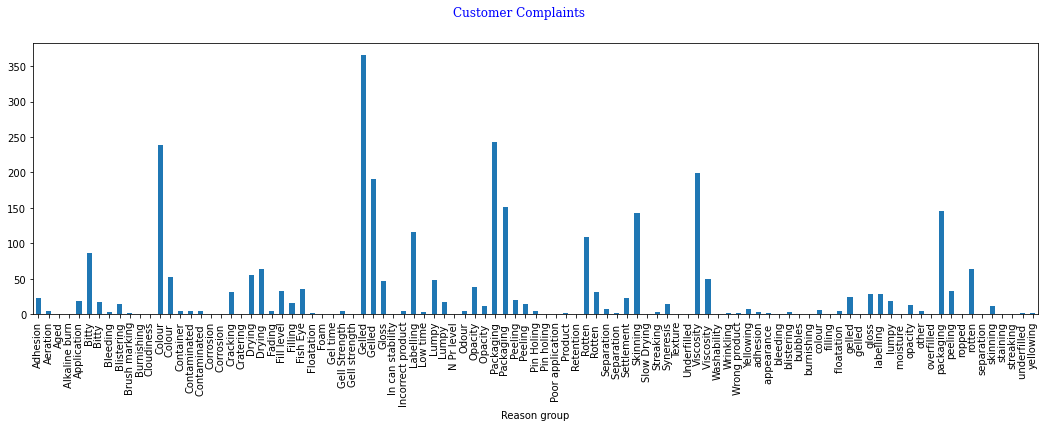

In [15]:
#No oversamling or undersampling is required

import matplotlib.pyplot as plt  # import pyplot to draw bar graph

f, ax = plt.subplots(figsize=(18,5))

font1 = {'family':'serif','color':'blue','size':10}      
font2 = {'family':'serif','color':'darkred','size':15}

plt.suptitle("Customer Complaints",fontdict = font1)     
df_gb = df_Complaints.groupby(['Reason group']).size()

df_gb.plot.bar()
plt.show()   


# note well, splitting needed to be done above for transformation to ensure that the test and train set were separate

# As can be seen the data is imbalanced, therefore multi-class balancing using SMOTE analysis could be carried out - however due to some classes having few entries SMOTE analysis is not possible

# random oversampling will be done - there is a risk of overfitting however some classes are very imbalanced 

In [16]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the TF-IDF vectors and corresponding labels using RandomOverSampler
train_x_resampled, train_y_resampled = oversampler.fit_resample(train_x_vector, train_y)



# STEP 5: Modelling and Tuning

#### 4.1. Split train into train and validation set

In [17]:
from sklearn.model_selection import train_test_split

# Split the training set after oversampling into a validation and test set. Validation for tuning
X_train, X_val, y_train, y_val = train_test_split(train_x_resampled, train_y_resampled, test_size=0.2, random_state=42)



#### 4.2. Model Training and Tuning

* with the numerical data, can experiment with different machine learning models and evaluate their accuracy
* Machine learning algorithms are divided between supervised learning and unsupervised learning. 
* In the first, models are trained using labeled data, while in the second 
* patterns are inferred from the unlabeled input data.
* In our example, our input (review) and output (sentiment) are clearly identified, 
* so we can say we have labeled input and output data; 
* therefore, we’re dealing with supervised learning. 
* Two common types of supervised learning algorithms are Regression and Classification.
> Regression: They’re used to predict continuous values such as price, salary, age, etc
> Classification: They’re used to predict discrete values such as male/female, spam/not spam, positive/negative, etc.

* That said, it’s now evident that we should use classification algorithms. 
* We will benchmark the following four classification models (SVM, Decision Tree, Naive Bayes)


* This is used to maximize the model performance
* The grid search method will be used
* This is technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters. 

* other examples of tuning: 

> * Bayesian Optimisation
> * Evolutionary Algorithms
> * Gradient-Based Optimisation. ...
> * Grid Search. ...
> * Keras' Tuner. ...
> * Population-based Optimisation. ...
> * ParamILS. ...
> * Random Search.



#### 4.2.1. Model 1: Support Vector Machines

In [18]:
# model tuning for svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



# Define the parameters grid
parameters = {'C': 
              [1, 4, 8, 16, 32], 
              'kernel': ['linear', 'rbf']}

# Initialize SVC and GridSearchCV with parameters and cross-validation
svc = SVC()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # Specify the number of splits (e.g., k=5)
svc_grid = GridSearchCV(svc, parameters, cv=k_fold,scoring='f1_weighted')

# for all tuning will specify tuning according to optimizing the f1 score due to imbalanced data

# Fit GridSearchCV to filtered training data
svc_grid.fit(X_train, y_train)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = svc_grid.best_estimator_.score(X_val, y_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the validation set
y_pred_val = svc_grid.best_estimator_.predict(X_val)
 

Precision = precision_score(y_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)


{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
Accuracy: 0.7990314769975787
Precision: 0.8989922809696869
Recall: 0.7990314769975787
f1: 0.7586512886252541


In [19]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = svc_grid.best_estimator_.score(X_train, y_train)  
y_pred = svc_grid.best_estimator_.predict(X_train)
 

Precision = precision_score(y_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
Accuracy: 0.8075610829848118
Precision: 0.895018706342539
Recall: 0.8075610829848118
f1: 0.76852158595259


Based on the results, the train set performs more or less the same as the validation set, so can say that there is no overfitting 

Also with the train and validation set, model performance is relatively good, so no underfitting either


#### 4.2.2.Model 2: Decision Tree

In [20]:
#model tuning for decision tree

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameters grid for Decision Tree
parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with parameters and cross-validation (Leave-One-Out)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # Specify the number of splits (e.g., k=5)
dt_grid = GridSearchCV(dt, parameters, cv=k_fold,scoring='f1_weighted')

#fit model with training data
dt_grid.fit(X_train, y_train)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = dt_grid.best_estimator_.score(X_val, y_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the test set
y_pred_val = dt_grid.best_estimator_.predict(X_val)
 

Precision = precision_score(y_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier()
Accuracy: 0.7990314769975787
Precision: 0.8989922809696869
Recall: 0.7990314769975787
f1: 0.7586512886252541


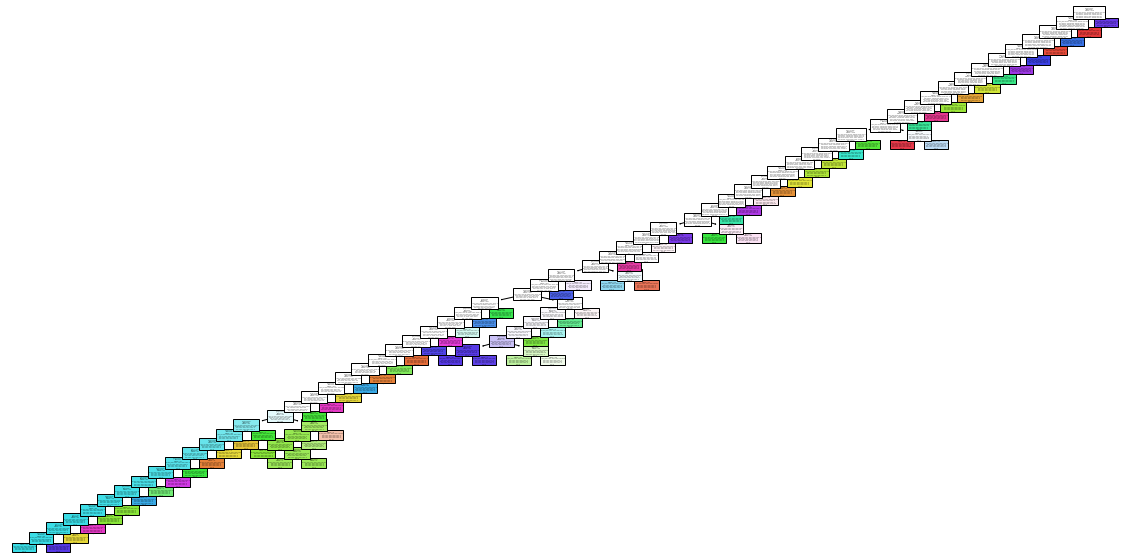

In [21]:
#visualize tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_grid.best_estimator_, filled=True)
plt.show()

In [42]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = dt_grid.best_estimator_.score(X_train, y_train)  
y_pred = dt_grid.best_estimator_.predict(X_train)
 

Precision = precision_score(y_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier()
Accuracy: 0.8075610829848118
Precision: 0.895018706342539
Recall: 0.8075610829848118
f1: 0.76852158595259


Based on the results, the train set performs more or less the same as the validation set, so can say that there is no overfitting 

Also with the train and validation set, model performance is relatively good, so no underfitting either

#### 4.2.3. Model 3: Naive Bayes

In [23]:
# Model tuning for naive bayes

from sklearn.naive_bayes import GaussianNB 

# Define the parameters grid for Gaussian Naive Bayes
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Initialize GridSearchCV with parameters and cross-validation (Leave-One-Out)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # Specify the number of splits (e.g., k=5)
gnb_grid = GridSearchCV(gnb, parameters, cv=k_fold,scoring='f1_weighted')

# Fit GridSearchCV to filtered training data
gnb_grid.fit(X_train.toarray(),y_train)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = gnb_grid.best_estimator_.score(X_val.toarray(), y_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the test set
y_pred_val = gnb_grid.best_estimator_.predict(X_val.toarray())
 

Precision = precision_score(y_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(gnb_grid.best_params_)
print(gnb_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'var_smoothing': 1e-09}
GaussianNB()
Accuracy: 0.785824345146379
Precision: 0.8935828718877782
Recall: 0.785824345146379
f1: 0.7378544192458438


In [41]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = gnb_grid.best_estimator_.score(X_train.toarray(), y_train)  
y_pred = gnb_grid.best_estimator_.predict(X_train.toarray())
 

Precision = precision_score(y_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(gnb_grid.best_params_)
print(gnb_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'var_smoothing': 1e-09}
GaussianNB()
Accuracy: 0.7961149020471054
Precision: 0.8938525227088002
Recall: 0.7961149020471054
f1: 0.7498054941972705


Based on the results, the train set performs more or less the same as the validation set, so can say that there is no overfitting 

Also with the train and validation set, model performance is relatively good, so no underfitting either

#### 4.2.4. Model 4: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameters grid for Random Forest
parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with parameters and cross-validation (e.g., KFold)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(rf, parameters, cv=k_fold,scoring='f1_weighted')

# Fit GridSearchCV to filtered training data (X_val should be the training data, y_val should be the labels)
rf_grid.fit(X_train.toarray(), y_train)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = rf_grid.best_estimator_.score(X_val, y_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the test set
y_pred_val = rf_grid.best_estimator_.predict(X_val)
 

Precision = precision_score(y_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted')


# Display best parameters and best estimator
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(min_samples_split=10, random_state=42)
Accuracy: 0.7990314769975787
Precision: 0.8989922809696869
Recall: 0.7990314769975787
f1: 0.7586512886252541


In [40]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = rf_grid.best_estimator_.score(X_train, y_train)  
y_pred = rf_grid.best_estimator_.predict(X_train)
 

Precision = precision_score(y_train, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(min_samples_split=10, random_state=42)
Accuracy: 0.8075610829848118
Precision: 0.895018706342539
Recall: 0.8075610829848118
f1: 0.76852158595259


Based on the results, the train set performs more or less the same as the validation set, so can say that there is no overfitting 

Also with the train and validation set, model performance is relatively good, so no underfitting either

# STEP 5: Model Evaluation

#### 5.1. Mean Accuracy

In [27]:
# .score method with the training set is used


print('svc_grid:',round(svc_grid.best_estimator_.score(test_x_vector, test_y),2))
print('dt_grid:', round(dt_grid.best_estimator_.score(test_x_vector, test_y),2))
print('gnb_grid:',round(gnb_grid.best_estimator_.score(test_x_vector.toarray(), test_y),2))
print('rf_grid:', round(dt_grid.best_estimator_.score(test_x_vector, test_y),2))




svc_grid: 0.5
dt_grid: 0.5
gnb_grid: 0.39
rf_grid: 0.5


#### 5.2. Classification Report

##### 5.2.1.Support Vector Machine

In [28]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_svc = svc_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_svc.predict(test_x_vector)

# Generate a classification report
report = classification_report(test_y, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)




Classification Report:
               precision    recall  f1-score     support
adhesion        1.000000  0.900000  0.947368   10.000000
aeration        0.500000  1.000000  0.666667    1.000000
alkaline burn   1.000000  0.000000  0.000000    1.000000
appearance      1.000000  0.000000  0.000000    1.000000
application     1.000000  0.000000  0.000000    7.000000
...                  ...       ...       ...         ...
wrong product   0.000000  1.000000  0.000000    0.000000
yellowing       0.076923  1.000000  0.142857    1.000000
accuracy        0.500502  0.500502  0.500502    0.500502
macro avg       0.684393  0.695380  0.444377  997.000000
weighted avg    0.943453  0.500502  0.572036  997.000000

[54 rows x 4 columns]


There seems to be overfitting with the model, since the performance has reduced signficantly from the train and validation data performance, so lets plot a learning curve to see if data shortage is the reason for the overfitting. Methods like regularization will have minimum effect in cases like this. Model tuning and hyperparameter selection was done and still the same result.

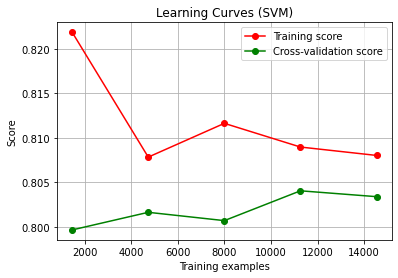

In [29]:
from sklearn.model_selection import learning_curve # to generate training and cross-validation scores across different training set sizes
import numpy as np

title = "Learning Curves (SVM)"
train_sizes, train_scores, valid_scores = learning_curve(svc_grid.best_estimator_, X_train, y_train, cv=k_fold)
 
# Calculate mean training and validation scores across different training set sizes
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

can see high variance which is why the model is overfitting
The curve highlights the point that to reduce variance in the model, more datapoints are required i.e. around 11000 points. Even with ensemble models like random forest the results are still the same.

##### 5.2.2. Decision Tree

In [30]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_dt = dt_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_dt.predict(test_x_vector)

# Generate a classification report
report = classification_report(test_y, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)


Classification Report:
               precision    recall  f1-score     support
adhesion        1.000000  0.900000  0.947368   10.000000
aeration        0.500000  1.000000  0.666667    1.000000
alkaline burn   1.000000  0.000000  0.000000    1.000000
appearance      1.000000  0.000000  0.000000    1.000000
application     1.000000  0.000000  0.000000    7.000000
...                  ...       ...       ...         ...
wrong product   0.000000  1.000000  0.000000    0.000000
yellowing       0.083333  1.000000  0.153846    1.000000
accuracy        0.501505  0.501505  0.501505    0.501505
macro avg       0.681727  0.695568  0.442828  997.000000
weighted avg    0.946727  0.501505  0.572872  997.000000

[54 rows x 4 columns]


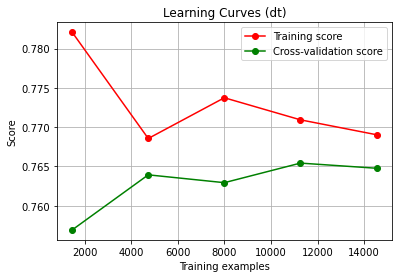

In [31]:
title = "Learning Curves (dt)"
train_sizes, train_scores, valid_scores = learning_curve(dt_grid.best_estimator_, X_train, y_train, cv=k_fold,scoring='f1_weighted')
 
# Calculate mean training and validation scores across different training set sizes
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

can see high variance which is why the model is overfitting
The curve highlights the point that to reduce variance in the model, more datapoints are required i.e. around 11000 points to improve the f1 score - better measure since model is imbalanced. Even with ensemble models like random forest the results are still the same.

##### 5.2.3. Naive Bayes

In [32]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_gnb = gnb_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_gnb.predict(test_x_vector.toarray())

# Generate a classification report
report = classification_report(test_y, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
               precision    recall  f1-score     support
adhesion        1.000000  0.900000  0.947368   10.000000
aeration        0.500000  1.000000  0.666667    1.000000
alkaline burn   1.000000  0.000000  0.000000    1.000000
appearance      1.000000  0.000000  0.000000    1.000000
application     0.285714  0.285714  0.285714    7.000000
...                  ...       ...       ...         ...
wrong product   0.000000  1.000000  0.000000    0.000000
yellowing       0.050000  1.000000  0.095238    1.000000
accuracy        0.388164  0.388164  0.388164    0.388164
macro avg       0.627236  0.684747  0.410074  997.000000
weighted avg    0.732465  0.388164  0.414614  997.000000

[54 rows x 4 columns]


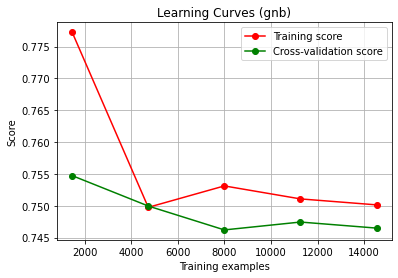

In [33]:
title = "Learning Curves (gnb)"
train_sizes, train_scores, valid_scores = learning_curve(gnb_grid.best_estimator_, X_train.toarray(), y_train, cv=k_fold,scoring='f1_weighted')
 
# Calculate mean training and validation scores across different training set sizes
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Indicates why naive bayes is good for text classificaiton where feature words can be treated independently. With fewer points at just over 4000, one can get a good model with relative low bias and variance

##### 5.2.4. Random Forest

In [34]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_rf = rf_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_rf.predict(test_x_vector)

# Generate a classification report
report = classification_report(test_y, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
               precision    recall  f1-score     support
adhesion        1.000000  0.900000  0.947368   10.000000
aeration        0.500000  1.000000  0.666667    1.000000
alkaline burn   1.000000  0.000000  0.000000    1.000000
appearance      1.000000  0.000000  0.000000    1.000000
application     1.000000  0.000000  0.000000    7.000000
...                  ...       ...       ...         ...
wrong product   0.000000  1.000000  0.000000    0.000000
yellowing       0.083333  1.000000  0.153846    1.000000
accuracy        0.501505  0.501505  0.501505    0.501505
macro avg       0.684544  0.695568  0.444720  997.000000
weighted avg    0.943597  0.501505  0.572725  997.000000

[54 rows x 4 columns]


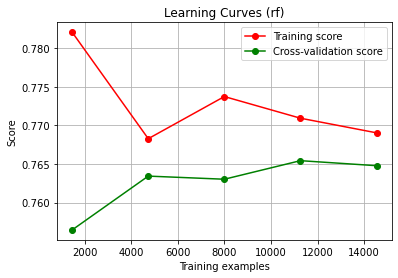

In [35]:
title = "Learning Curves (rf)"
train_sizes, train_scores, valid_scores = learning_curve(rf_grid.best_estimator_, X_train.toarray(), y_train, cv=k_fold,scoring='f1_weighted')
 
# Calculate mean training and validation scores across different training set sizes
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

can see high variance which is why the model is overfitting
The curve highlights the point that to reduce variance in the model, more datapoints are required i.e. around 11000 points to improve the f1 score - better measure since model is imbalanced. Even with ensemble models like random forest the results are still the same.

#### 5.3. Confusion Matrix

##### 5.3.1 SVM Model

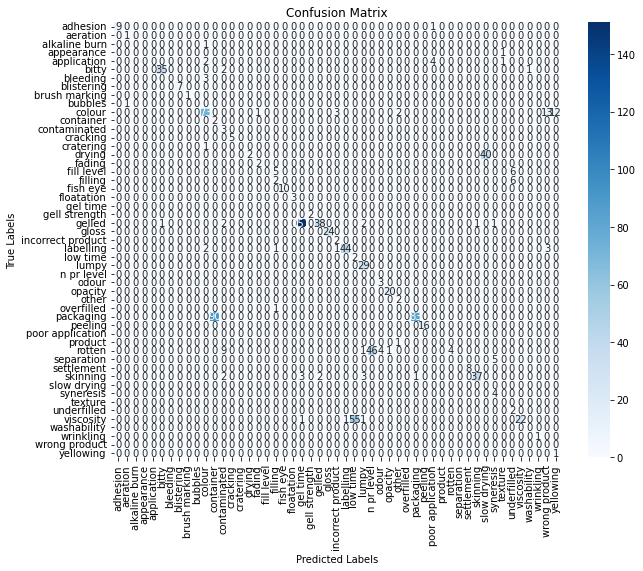

In [36]:
# for SVM model 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming svc_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_svc = svc_grid.best_estimator_

# Predict labels on the test set
y_pred = best_svc.predict(test_x_vector)

# Get unique class labels from the predicted and true labels
classes = sorted(set(test_y) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 5.3.2. Decision tree

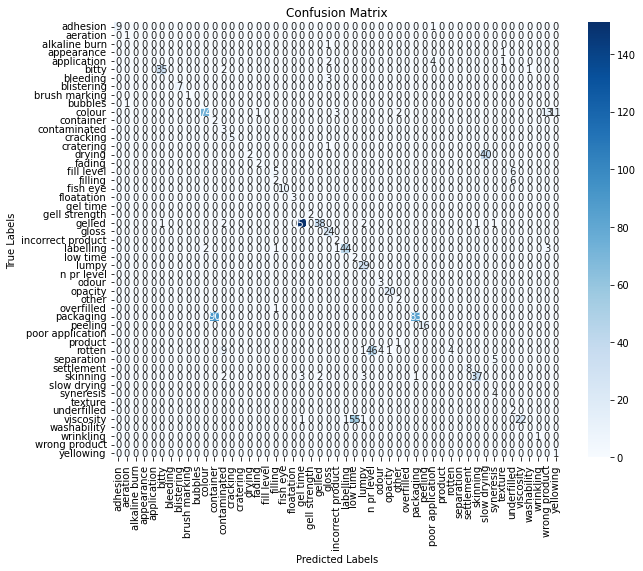

In [37]:
# for decision tree model 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_dt= dt_grid.best_estimator_

# Predict labels on the test set
y_pred = best_dt.predict(test_x_vector)

# Get unique class labels from the predicted and true labels
classes = sorted(set(test_y) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 5.3.3. Naive Bayes

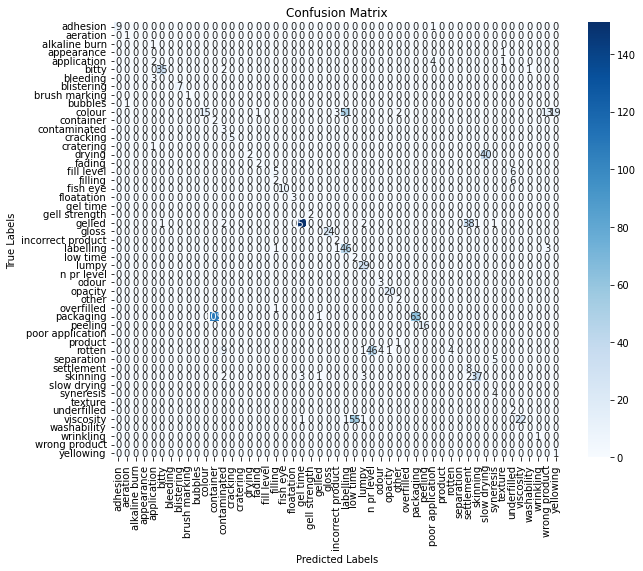

In [38]:
# for Naive Bayes

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_gnb= gnb_grid.best_estimator_

# Predict labels on the test set
y_pred = best_gnb.predict(test_x_vector.toarray())

# Get unique class labels from the predicted and true labels
classes = sorted(set(test_y) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 5.3.4. Random Forest

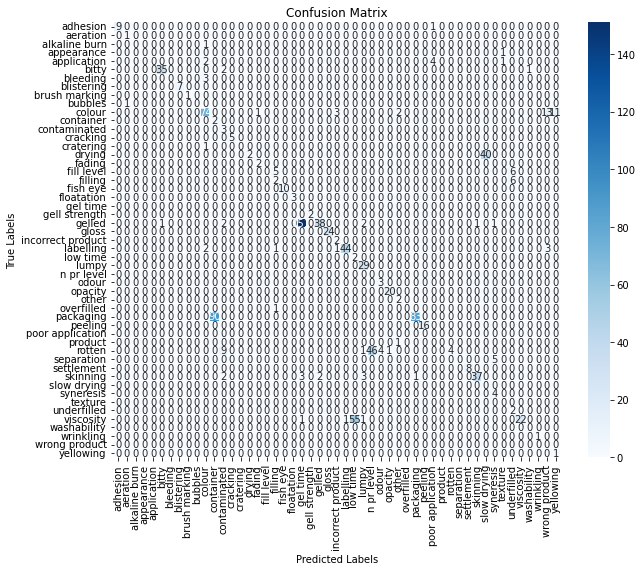

In [39]:
# Random Forest

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_rf= rf_grid.best_estimator_

# Predict labels on the test set
y_pred = best_rf.predict(test_x_vector.toarray())

# Get unique class labels from the predicted and true labels
classes = sorted(set(test_y) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

All models seem to be performing fairly well, however collecting more samples for the under-represented classes will improve the reliability of the model 

# Step 6: Model Deployment and Consumption